In [ ]:
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
file=tf.keras.utils
raw_df=pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
raw_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
raw_df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
raw_df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V26', 'V27', 'V28', 'Amount', 'Class']].describe()

,Time,V1,V2,V3,V4,V5,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
cleaned_df=raw_df.copy()
cleaned_df.pop('Time')
eps=0.001
cleaned_df['Log Ammount']=np.log(cleaned_df.pop('Amount')+eps)

In [ ]:
cleaned_df['Log Ammount']

0         5.008105
1         0.989913
2         5.936641
3         4.816249
4         4.248367
            ...   
284802   -0.260067
284803    3.210481
284804    4.217756
284805    2.302685
284806    5.379902
Name: Log Ammount, Length: 284807, dtype: float64

In [ ]:
train_df,test_df=train_test_split(cleaned_df,test_size=0.2)
train_df,val_df=train_test_split(train_df,test_size=0.2)

In [ ]:
train_labels=np.array(train_df.pop('Class'))
bool_train_labels=train_labels!=0
val_labels=np.array(val_df.pop('Class'))
test_labels=np.array(test_df.pop('Class'))

In [ ]:
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [ ]:
bool_train_labels

array([False, False, False, ..., False, False, False])

In [ ]:
train_features

array([[ 1.85266763e+00,  2.46576654e-01,  3.11670000e-01, ...,
         1.50072896e-02, -2.99448994e-02,  2.43194530e+00],
       [ 1.91190134e+00, -2.74744759e-01, -2.19168667e+00, ...,
        -8.14832997e-02, -6.74450115e-02,  4.38191413e+00],
       [ 1.33168072e+00, -1.45227544e+00, -1.68106691e+00, ...,
        -9.57727750e-02,  1.09003538e-04,  5.92692869e+00],
       ...,
       [ 1.27518780e+00,  1.51546274e-01, -1.05575628e-01, ...,
        -3.50836770e-02, -7.55828357e-03, -6.90775528e+00],
       [ 2.19012900e+00, -1.46153591e+00, -8.03229671e-01, ...,
         1.61476018e-02, -4.34131034e-02,  3.73769343e+00],
       [ 2.04342203e+00, -1.29588775e-01, -1.18335816e+00, ...,
        -7.68844633e-02, -7.41984430e-02, -1.15410852e-01]])

In [ ]:
test_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Log Ammount
193901,-1.317894,-5.737663,-3.166621,2.541328,-1.030379,2.045651,1.687115,0.114330,0.930431,-0.536151,-0.094726,-0.077269,-2.492647,1.007913,-0.693998,-0.965073,0.542166,-0.216320,-1.192589,2.820370,1.340403,0.517894,-1.579150,-1.552820,-0.261258,-0.256836,-0.255007,0.197030,7.408531
125398,1.018094,0.141500,0.124154,1.054860,-0.015409,-0.363232,0.332991,-0.061934,-0.493112,0.099256,1.806037,1.308793,0.322917,0.630822,0.268252,-0.251014,-0.281545,-0.371211,-0.454178,-0.000905,0.112065,0.227156,-0.120797,0.237156,0.588209,-0.367361,0.006140,0.018637,4.324676
209789,-1.342084,0.508877,-1.561584,-1.653315,3.125612,3.255534,0.292683,1.113707,0.110308,-1.472259,0.067581,-0.102017,-0.504003,-1.406332,-0.032191,-0.003299,1.095232,0.122498,-0.148141,0.053883,-0.252876,-0.578785,-0.360815,0.592049,0.114190,-0.089912,0.070452,-0.235864,4.209026
205698,1.341926,-3.354416,-1.832704,-2.210691,-0.015999,4.163422,-1.854486,0.975552,-0.836848,1.305638,-0.254931,-0.652624,0.629579,-0.588553,0.810965,0.000989,0.152264,0.330772,-0.701690,0.589424,0.174710,-0.109937,-0.019692,0.696542,-0.687723,-0.258124,-0.000215,0.043909,6.150690
210991,-0.519939,1.318205,-0.841631,-0.379015,0.877433,-0.891597,0.631607,0.295240,-0.606105,-0.955083,0.706742,0.705412,0.620166,-0.537997,-0.078330,0.431866,0.249602,1.382640,0.323956,0.050978,0.363381,1.123646,-0.278261,-0.543799,-0.343515,-0.134831,0.354821,0.207748,1.740642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86829,0.477066,-1.828096,0.497694,0.817929,-1.685796,0.031564,-0.381768,0.066775,-0.582765,0.711164,0.589642,0.138304,-0.836560,0.242128,-0.219542,-1.149772,-0.238557,2.133105,-0.945087,0.213701,0.039326,-0.244228,-0.405729,0.299152,0.310501,-0.278590,-0.008703,0.091462,6.016160
29658,1.318484,0.179762,0.148082,0.430639,-0.130712,-0.528721,-0.000243,-0.114680,0.201871,-0.045293,-1.077679,-0.256509,-0.194471,0.319690,1.165201,0.578128,-0.690291,-0.188220,0.201456,-0.107773,-0.320001,-0.952681,0.040544,-0.478732,0.307074,0.148773,-0.034482,0.009139,0.683602
157186,1.988804,0.167116,-1.503165,1.627019,0.346498,-1.130443,0.479328,-0.421255,1.709677,-0.078815,-0.278364,-2.973715,-0.108655,2.269736,-1.090032,-0.695979,0.691430,-0.200089,-0.423747,-0.396405,-0.104559,0.054670,0.008732,-0.108353,0.376608,-0.525390,-0.055215,-0.067863,3.409529
174181,0.258710,-3.053998,-2.295838,0.489629,0.022466,1.664554,0.723860,0.267794,0.525913,-0.417413,1.025924,0.684667,-0.675447,1.008774,1.329797,-0.115170,-0.222254,-0.886964,-0.752425,1.426375,0.165418,-1.468621,-0.219974,-1.018354,-0.993846,-0.885927,-0.126794,0.090890,6.761389


In [ ]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

In [ ]:
test_features

array([[-0.67775549, -3.48839715, -2.09218143, ..., -0.63291411,
         0.61019156,  2.21079595],
       [ 0.52048243,  0.08490125,  0.08134618, ...,  0.01646219,
         0.0579593 ,  0.68313558],
       [-0.69016386,  0.30818919, -1.03206895, ...,  0.17638047,
        -0.72987183,  0.62584611],
       ...,
       [ 1.01840522,  0.10046997, -0.99348386, ..., -0.13610531,
        -0.20980856,  0.22979635],
       [ 0.13095907, -1.8572918 , -1.51703717, ..., -0.31409737,
         0.28162373,  1.89021872],
       [ 0.64588123, -0.68427541, -0.79360509, ..., -0.00380404,
         0.07233725,  0.85282054]])

In [ ]:
val_features

array([[ 0.65488588, -0.23104744,  0.15870847, ...,  0.18264705,
         0.1107382 ,  0.16591475],
       [-0.55841303,  0.97447722,  1.34825315, ..., -0.16320957,
        -0.75433773, -0.37345166],
       [ 0.52674543, -0.58579902,  0.14433186, ..., -0.00867325,
         0.14263143,  1.13290233],
       ...,
       [-0.65965841,  0.55351918,  1.53438649, ...,  0.5950676 ,
         0.15724191,  0.42653664],
       [-0.12419555, -0.06156766,  1.49596689, ...,  0.44914204,
         0.54106546, -1.80157109],
       [ 0.54219015, -0.36089097,  0.7736733 , ..., -0.07643119,
         0.01756299,  0.29391159]])

In [ ]:
train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


In [ ]:
test_features

array([[-0.67775549, -3.48839715, -2.09218143, ..., -0.63291411,
         0.61019156,  2.21079595],
       [ 0.52048243,  0.08490125,  0.08134618, ...,  0.01646219,
         0.0579593 ,  0.68313558],
       [-0.69016386,  0.30818919, -1.03206895, ...,  0.17638047,
        -0.72987183,  0.62584611],
       ...,
       [ 1.01840522,  0.10046997, -0.99348386, ..., -0.13610531,
        -0.20980856,  0.22979635],
       [ 0.13095907, -1.8572918 , -1.51703717, ..., -0.31409737,
         0.28162373,  1.89021872],
       [ 0.64588123, -0.68427541, -0.79360509, ..., -0.00380404,
         0.07233725,  0.85282054]])

In [ ]:
pos_df=pd.DataFrame(train_features[bool_train_labels],columns=train_df.columns)
neg_df=pd.DataFrame(train_features[~bool_train_labels],columns=train_df.columns)


In [ ]:
neg_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Log Ammount
0,0.948575,0.148766,0.205199,2.746032,-0.273287,0.166452,-0.421643,0.092712,-0.224716,1.256104,-1.369861,-0.227212,0.005473,-0.263040,-0.627562,1.359233,-1.054663,0.051878,-2.146721,-0.357609,0.238387,0.843078,0.299616,0.034505,-0.467925,0.054828,0.038511,-0.092430,-0.254473
1,0.978958,-0.168089,-1.448246,0.208553,0.405376,-0.604519,0.489093,-0.199855,0.264521,0.143280,0.663656,0.320362,-1.617129,1.173959,-0.721888,-0.750028,-0.267644,0.049548,0.444839,-0.221765,0.292769,0.767614,-0.152256,1.190902,0.875517,-0.251562,-0.201426,-0.208515,0.711490
2,0.681336,-0.883780,-1.110986,0.523252,-0.500316,-0.818271,0.371598,-0.244230,0.994078,-0.114399,-1.157271,-0.966591,-2.424944,0.981144,0.962797,-0.212238,-0.254929,0.352607,-0.475877,0.441357,0.694828,1.021644,-0.553745,-0.014473,0.178760,-0.098766,-0.236958,0.000605,1.476849
3,-2.100326,1.868784,-0.551804,-0.342925,-0.668520,-0.165250,-0.598001,1.364512,0.192901,0.795209,-1.364383,0.226933,0.135819,0.911298,1.255126,0.427565,0.301119,-0.560239,-0.054106,0.005006,-0.253338,-0.967234,0.223937,-1.313004,1.239997,0.571526,-1.160115,0.566059,-0.197778
4,0.478700,-0.546481,0.506426,0.222988,-0.325479,1.490203,-0.883294,0.583591,-0.649948,0.591677,1.673807,1.029588,0.046076,0.087274,0.785652,-2.842047,1.044971,-0.003041,-2.942602,-0.694185,-0.043503,0.705011,0.008179,-1.694314,0.292536,-0.243532,0.330339,0.064805,0.686143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181944,0.538144,0.055344,0.356277,0.333978,0.162853,0.653817,-0.186082,0.286463,-0.071801,-0.248986,1.101638,1.136704,0.740730,0.278821,2.226751,-1.228444,1.011856,-3.176481,-2.207368,-0.267971,-0.149927,-0.193821,0.483164,-1.035149,-0.235721,0.418807,0.116959,0.026964,-1.463673
181945,0.556628,0.002074,-0.047180,0.384884,-0.087046,-0.578846,0.334990,-0.145814,-0.111482,-0.109390,-0.072613,0.095590,-0.494215,0.653393,1.181028,-0.259708,0.071525,-1.492712,-0.335166,-0.011935,-0.426839,-1.527827,0.185181,0.105674,0.319021,0.335695,-0.162124,0.058128,0.741292
181946,0.652358,0.091007,-0.070388,0.357622,0.101779,-0.196154,0.131085,-0.087982,0.153771,-0.146630,-0.729101,0.327699,0.170519,0.158494,0.354038,-0.548490,0.087640,-1.125498,-0.054128,-0.175393,-0.097947,0.005642,-0.227633,-0.593430,1.274281,1.276968,-0.086047,-0.023130,-4.881113
181947,1.121675,-0.889409,-0.531183,-1.172291,-0.837025,-0.099932,-1.003135,-0.030362,-1.361946,1.536256,0.859862,0.352646,1.211232,-0.486906,-0.901006,-0.430931,0.253078,0.340278,0.019554,-0.387330,-0.107585,0.302193,0.412376,1.168899,-0.509135,-0.482796,0.041346,-0.134122,0.392360


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


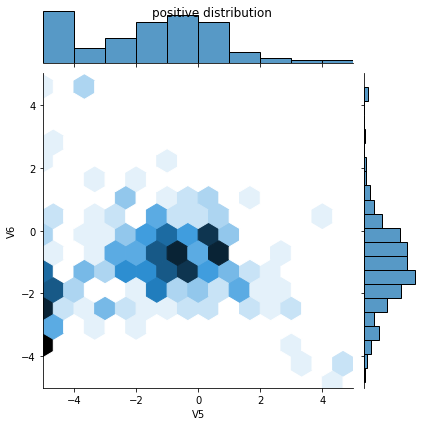

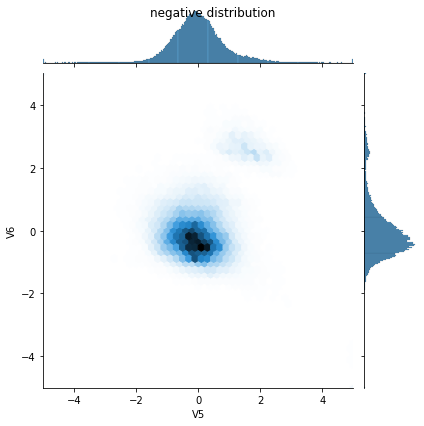

In [ ]:
sns.jointplot(pos_df['V5'],pos_df['V6'],kind='hex',xlim=(-5,5),ylim=(-5,5))
plt.suptitle("positive distribution")
sns.jointplot(neg_df['V5'],neg_df['V6'],kind='hex',xlim=(-5,5),ylim=(-5,5))
_=plt.suptitle("negative distribution")

In [ ]:
METRICS=[
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'),
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc')
]
def make_model(metrics=METRICS,output_bias=None):
  if output_bias is not None:
    output_bias=tf.keras.initializers.Constant(output_bias)
  model=keras.Sequential([
      keras.layers.Dense(16,activation='relu',input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1,activation='sigmoid',bias_initializer=output_bias),
  
  ])
  model.compile(optimizer=keras.optimizers.Adam(lr=1e-3),loss=keras.losses.BinaryCrossentropy(),metrics=metrics)
  return model


In [ ]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [ ]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.predict(train_features[:10])

array([[0.48062578],
       [0.58998275],
       [0.18803188],
       [0.30794552],
       [0.8248207 ],
       [0.47296646],
       [0.5402117 ],
       [0.5779886 ],
       [0.5212606 ],
       [0.5888759 ]], dtype=float32)

In [ ]:
results=model.evaluate(train_features,train_labels,batch_size=BATCH_SIZE,verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.9102


In [ ]:
neg, pos = np.bincount(raw_df['Class'])

In [ ]:
total = neg + pos


In [ ]:
initial_bias=np.log([pos/neg])
initial_bias

array([-6.35935934])

In [ ]:
model = make_model(output_bias = initial_bias)
model.predict(train_features[:10])

array([[0.00131684],
       [0.00469666],
       [0.00320977],
       [0.00128583],
       [0.0020252 ],
       [0.00213964],
       [0.00325066],
       [0.00387832],
       [0.00077335],
       [0.00140408]], dtype=float32)

In [ ]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.0145


In [ ]:
initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
model.save_weights(initial_weights)

In [ ]:
initial_weights

'/tmp/tmpbd55jcqi/initial_weights'

In [ ]:
model=make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history=model.fit(train_features,train_labels,batch_size=BATCH_SIZE,epochs=20,validation_data=(val_features,val_labels),verbose=0)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [ ]:
def plot_loss(history,label,n):
  plt.semilogy(history.epoch,history.history['loss'],color=colors[n],label='Train'+label)
  plt.semilogy(history.epoch,history.history['val_loss'],color=colors[n],label='Val'+label,linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()


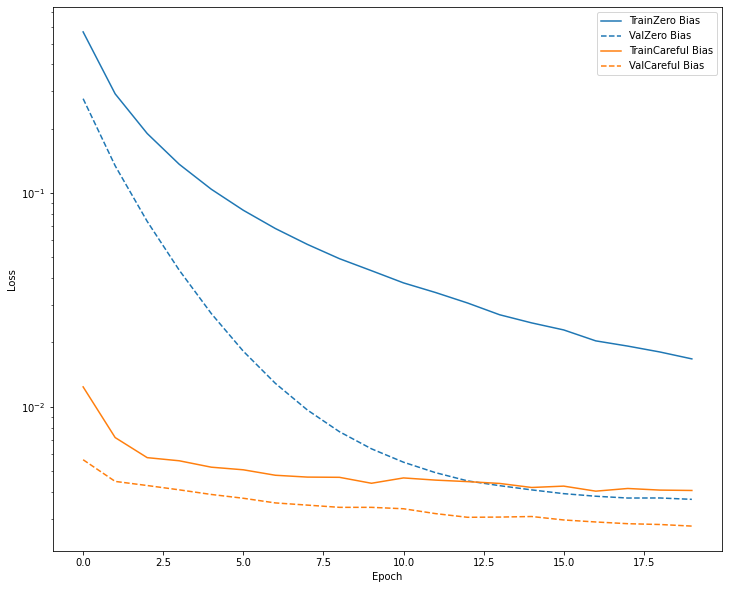

In [ ]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [ ]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
90/90 [==============================] - 1s 13ms/step - loss: 0.0126 - tp: 70.0000 - fp: 99.0000 - tn: 227357.0000 - fn: 319.0000 - accuracy: 0.9982 - precision: 0.4142 - recall: 0.1799 - auc: 0.7616 - val_loss: 0.0058 - val_tp: 10.0000 - val_fp: 1.0000 - val_tn: 45506.0000 - val_fn: 52.0000 - val_accuracy: 0.9988 - val_precision: 0.9091 - val_recall: 0.1613 - val_auc: 0.9096
Epoch 2/100
90/90 [==============================] - 1s 6ms/step - loss: 0.0072 - tp: 102.0000 - fp: 26.0000 - tn: 181923.0000 - fn: 225.0000 - accuracy: 0.9986 - precision: 0.7969 - recall: 0.3119 - auc: 0.8958 - val_loss: 0.0045 - val_tp: 26.0000 - val_fp: 11.0000 - val_tn: 45496.0000 - val_fn: 36.0000 - val_accuracy: 0.9990 - val_precision: 0.7027 - val_recall: 0.4194 - val_auc: 0.9104
Epoch 3/100
90/90 [==============================] - 1s 6ms/step - loss: 0.0057 - tp: 166.0000 - fp: 28.0000 - tn: 181921.0000 - fn: 161.0000 - accuracy: 0.9990 - precision: 0.8557 - recall: 0.5076 - auc: 0.9177 - val

In [ ]:
def plot_metrics(history):
  metrics=['loss','auc','precision','recall']
  for n,metric in enumerate(metrics):
    name=metric.replace("-"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch,history.history[metric],color=colors[0],label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

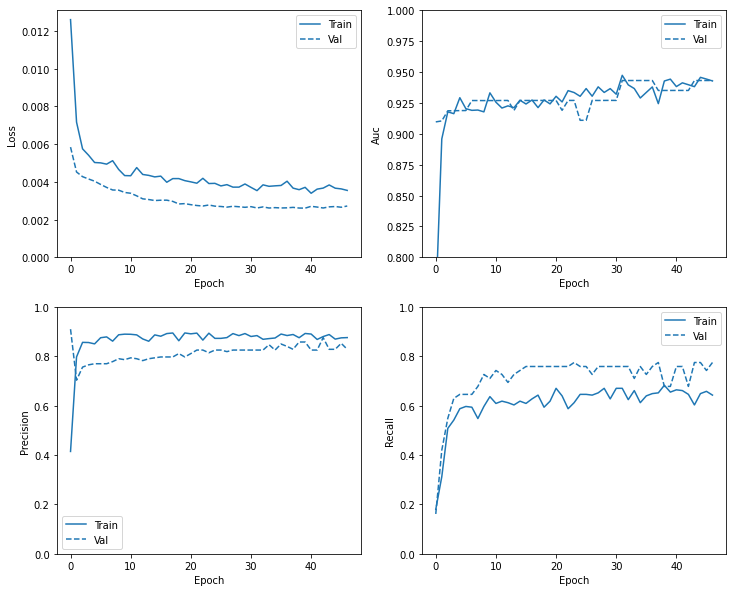

In [ ]:
plot_metrics(baseline_history)

In [ ]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [ ]:
def plot_cm(labels,prediction,p=0.5):
  cm=confusion_matrix(labels,prediction>p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm,annot=True,fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')
  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.0029652328230440617
tp :  76.0
fp :  9.0
tn :  56850.0
fn :  27.0
accuracy :  0.9993680119514465
precision :  0.8941176533699036
recall :  0.737864077091217
auc :  0.9365396499633789

Legitimate Transactions Detected (True Negatives):  56850
Legitimate Transactions Incorrectly Detected (False Positives):  9
Fraudulent Transactions Missed (False Negatives):  27
Fraudulent Transactions Detected (True Positives):  76
Total Fraudulent Transactions:  103


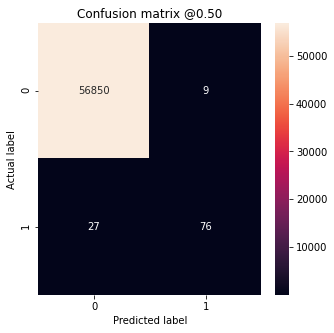

In [ ]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [ ]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

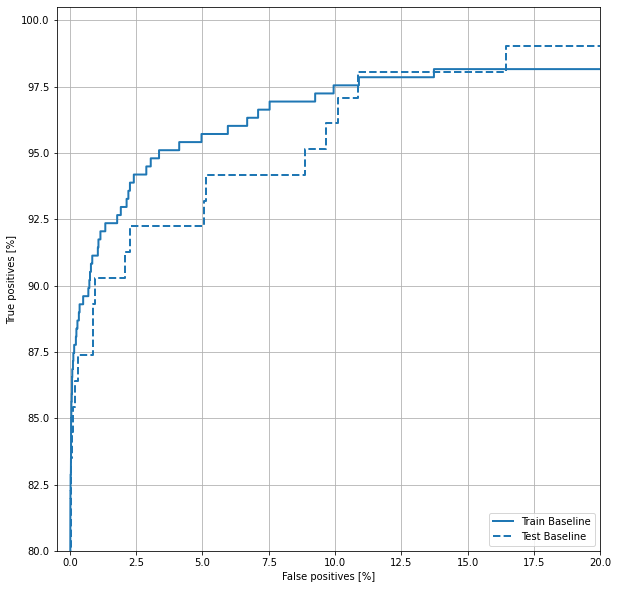

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [ ]:
weight_for_0=(1/neg)*total/2.0
weight_for_1=(1/pos)*total/2.0
class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))


Weight for class 0: 0.50
Weight for class 1: 289.44


In [ ]:
weighted_model=make_model()
weighted_model.load_weights(initial_weights)
weighted_history=weighted_model.fit(train_features,train_labels,batch_size=BATCH_SIZE,epochs=EPOCHS,callbacks = [early_stopping],validation_data=(val_features, val_labels),class_weight=class_weight)

Epoch 1/100
90/90 [==============================] - 1s 13ms/step - loss: 1.9812 - tp: 138.0000 - fp: 409.0000 - tn: 238399.0000 - fn: 292.0000 - accuracy: 0.9971 - precision: 0.2523 - recall: 0.3209 - auc: 0.8201 - val_loss: 0.0099 - val_tp: 25.0000 - val_fp: 51.0000 - val_tn: 45456.0000 - val_fn: 37.0000 - val_accuracy: 0.9981 - val_precision: 0.3289 - val_recall: 0.4032 - val_auc: 0.9411
Epoch 2/100
90/90 [==============================] - 1s 6ms/step - loss: 0.8428 - tp: 179.0000 - fp: 966.0000 - tn: 180983.0000 - fn: 148.0000 - accuracy: 0.9939 - precision: 0.1563 - recall: 0.5474 - auc: 0.9138 - val_loss: 0.0154 - val_tp: 47.0000 - val_fp: 105.0000 - val_tn: 45402.0000 - val_fn: 15.0000 - val_accuracy: 0.9974 - val_precision: 0.3092 - val_recall: 0.7581 - val_auc: 0.9705
Epoch 3/100
90/90 [==============================] - 1s 6ms/step - loss: 0.5812 - tp: 230.0000 - fp: 1602.0000 - tn: 180347.0000 - fn: 97.0000 - accuracy: 0.9907 - precision: 0.1255 - recall: 0.7034 - auc: 0.9259

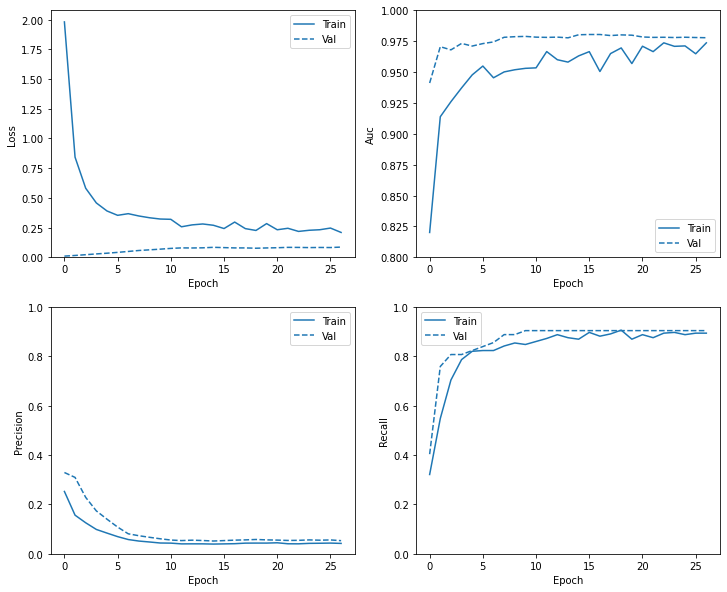

In [ ]:
plot_metrics(weighted_history)

In [ ]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.07664217054843903
tp :  93.0
fp :  1146.0
tn :  55713.0
fn :  10.0
accuracy :  0.9797057509422302
precision :  0.07506053149700165
recall :  0.9029126167297363
auc :  0.9841302633285522

Legitimate Transactions Detected (True Negatives):  55713
Legitimate Transactions Incorrectly Detected (False Positives):  1146
Fraudulent Transactions Missed (False Negatives):  10
Fraudulent Transactions Detected (True Positives):  93
Total Fraudulent Transactions:  103


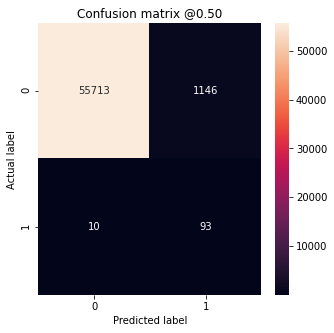

In [ ]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

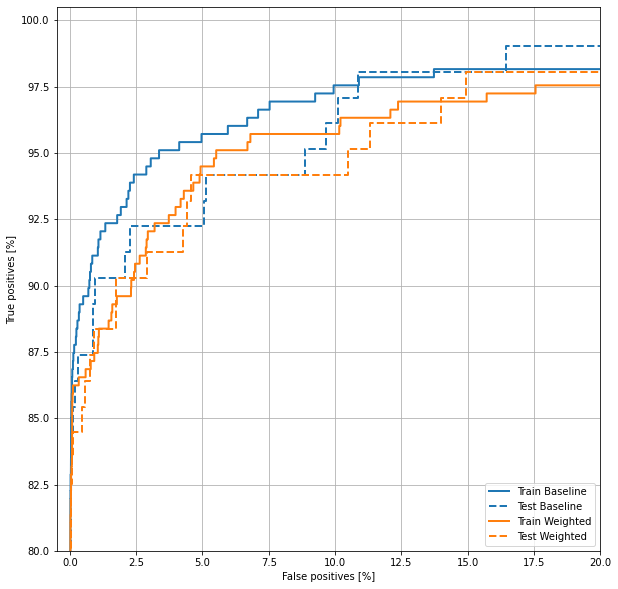

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [ ]:
pos_features=train_features[bool_train_labels]
neg_features=train_features[~bool_train_labels]

In [ ]:
pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [ ]:
len(neg_features)

181949

In [ ]:
np.random.choice(29,10)

array([28,  3, 22,  6, 16,  7, 13, 19,  5, 17])

In [ ]:
ids=np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))
res_pos_features=pos_features[choices]
res_pos_labels=pos_labels[choices]

In [ ]:
choices

array([180,  59, 272, ...,   0,   0, 106])

In [ ]:
len(pos_features)

327

In [ ]:
res_pos_features.shape

(181949, 29)

In [ ]:
pos_features.shape

(327, 29)

In [ ]:
pos_features

array([[-3.0671786 , -4.37535592, -3.5595913 , ...,  1.40824455,
        -3.2009021 ,  1.35966088],
       [-0.90284591,  1.98429093, -2.74393231, ...,  2.64440365,
         1.55161519, -1.45869897],
       [ 0.93858426,  0.45190475, -0.74899869, ...,  0.10278157,
         0.07116578, -0.04443074],
       ...,
       [-2.81681572,  2.02257347, -3.96115681, ..., -4.81658835,
         4.70933177, -3.69325925],
       [-0.79897644,  1.02863487, -0.59730034, ...,  0.98391159,
         0.08599339,  1.45662726],
       [-1.65106636, -0.2224726 , -0.83411923, ...,  2.15480752,
        -1.34156458, -0.57900702]])

In [ ]:
pos_features[1]

array([-0.90284591,  1.98429093, -2.74393231,  2.76545563, -1.27491867,
       -0.75734637, -3.48591839,  1.30547547, -2.99481942, -5.        ,
        4.41647142, -5.        , -0.12403273, -5.        ,  0.12247102,
       -5.        , -5.        , -2.85303152,  3.90599297,  1.12573371,
        1.23523623,  0.07589694, -0.5932269 , -1.28288471,  0.5590904 ,
        0.0556893 ,  2.64440365,  1.55161519, -1.45869897])

In [ ]:
resampled_features=np.concatenate([res_pos_features,neg_features],axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

In [ ]:
order=np.arange(len(resampled_labels))
order

array([     0,      1,      2, ..., 363895, 363896, 363897])

In [ ]:
np.random.shuffle(order)


In [ ]:
resampled_features.shape

(363898, 29)

In [ ]:
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape


(363898, 29)

In [ ]:
BUFFER_SIZE=100000
def make_ds(features,labels):
  ds=tf.data.Dataset.from_tensor_slices((features,labels))
  ds=ds.shuffle(BUFFER_SIZE).repeat()
  return ds

In [ ]:
pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [ ]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [-0.0528988   1.69792449 -4.24355606  2.28817447 -1.18645028 -2.08263048
 -1.86851745  0.80413657 -1.72309934 -4.49974716  2.98136973 -5.
 -1.47277141 -5.          2.18355503 -4.35069153 -2.9273054  -1.03167452
  2.85627366  0.43784419  0.87777483  0.17717376  0.33046451  0.01375001
 -0.33669863  1.19442047  0.38133921 -0.30363534  0.79574158]

Label:  1


In [ ]:
resampled_ds=tf.data.experimental.sample_from_datasets([pos_ds,neg_ds],weights=[0.5,0.5])
resampled_ds=resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [ ]:
next(iter(resampled_ds))

In [ ]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch


278.0

In [ ]:
next(iter(resampled_ds))

(<tf.Tensor: shape=(2048, 29), dtype=float64, numpy=
 array([[-0.19935683,  0.58825106,  0.76137184, ...,  0.58079568,
          0.25907797, -0.46497688],
        [-0.32617243,  0.73389079, -0.50805692, ..., -3.22696692,
         -1.08775693, -0.31900049],
        [-0.57554983,  0.37167554,  0.8439351 , ...,  0.59277019,
          0.56674477,  1.245974  ],
        ...,
        [ 1.00492863, -0.93762584, -0.83964672, ...,  0.32266011,
         -0.1145916 ,  0.53495577],
        [-1.41329462, -4.12024178, -1.22191778, ..., -1.08248672,
          1.02522244,  2.30995796],
        [-1.65106636, -0.2224726 , -0.83411923, ...,  2.15480752,
         -1.34156458, -0.57900702]])>,
 <tf.Tensor: shape=(2048,), dtype=int64, numpy=array([0, 0, 0, ..., 0, 0, 1])>)

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks = [early_stopping],
    validation_data=val_ds)

Epoch 1/100
278/278 [==============================] - 5s 17ms/step - loss: 0.3589 - tp: 249401.0000 - fp: 60674.0000 - tn: 281272.0000 - fn: 34959.0000 - accuracy: 0.8473 - precision: 0.8043 - recall: 0.8771 - auc: 0.9358 - val_loss: 0.1885 - val_tp: 57.0000 - val_fp: 1243.0000 - val_tn: 44264.0000 - val_fn: 5.0000 - val_accuracy: 0.9726 - val_precision: 0.0438 - val_recall: 0.9194 - val_auc: 0.9723
Epoch 2/100
278/278 [==============================] - 4s 15ms/step - loss: 0.1878 - tp: 259874.0000 - fp: 15761.0000 - tn: 268609.0000 - fn: 25100.0000 - accuracy: 0.9282 - precision: 0.9428 - recall: 0.9119 - auc: 0.9766 - val_loss: 0.1048 - val_tp: 57.0000 - val_fp: 960.0000 - val_tn: 44547.0000 - val_fn: 5.0000 - val_accuracy: 0.9788 - val_precision: 0.0560 - val_recall: 0.9194 - val_auc: 0.9690
Epoch 3/100
278/278 [==============================] - 4s 15ms/step - loss: 0.1487 - tp: 262630.0000 - fp: 10616.0000 - tn: 273742.0000 - fn: 22356.0000 - accuracy: 0.9421 - precision: 0.9611 -

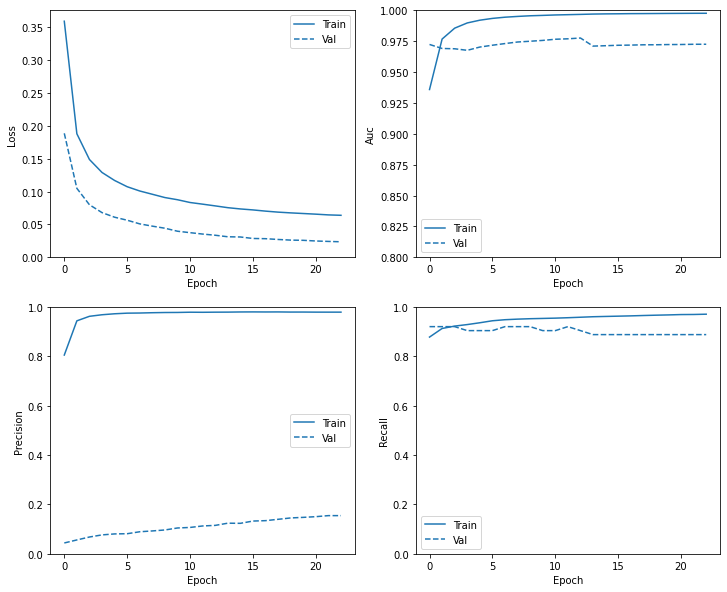

In [ ]:
plot_metrics(resampled_history )

In [ ]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch = 20,
    epochs=10*EPOCHS,
    callbacks = [early_stopping],
    validation_data=(val_ds))


Epoch 1/1000
20/20 [==============================] - 1s 52ms/step - loss: 0.7381 - tp: 14002.0000 - fp: 9766.0000 - tn: 56260.0000 - fn: 6501.0000 - accuracy: 0.8120 - precision: 0.5891 - recall: 0.6829 - auc: 0.8942 - val_loss: 0.6920 - val_tp: 59.0000 - val_fp: 17510.0000 - val_tn: 27997.0000 - val_fn: 3.0000 - val_accuracy: 0.6157 - val_precision: 0.0034 - val_recall: 0.9516 - val_auc: 0.9116
Epoch 2/1000
20/20 [==============================] - 0s 22ms/step - loss: 0.5428 - tp: 17306.0000 - fp: 8281.0000 - tn: 12092.0000 - fn: 3281.0000 - accuracy: 0.7177 - precision: 0.6764 - recall: 0.8406 - auc: 0.8369 - val_loss: 0.6121 - val_tp: 58.0000 - val_fp: 13395.0000 - val_tn: 32112.0000 - val_fn: 4.0000 - val_accuracy: 0.7060 - val_precision: 0.0043 - val_recall: 0.9355 - val_auc: 0.9482
Epoch 3/1000
20/20 [==============================] - 0s 21ms/step - loss: 0.4662 - tp: 18030.0000 - fp: 7249.0000 - tn: 13285.0000 - fn: 2396.0000 - accuracy: 0.7645 - precision: 0.7132 - recall: 0.8

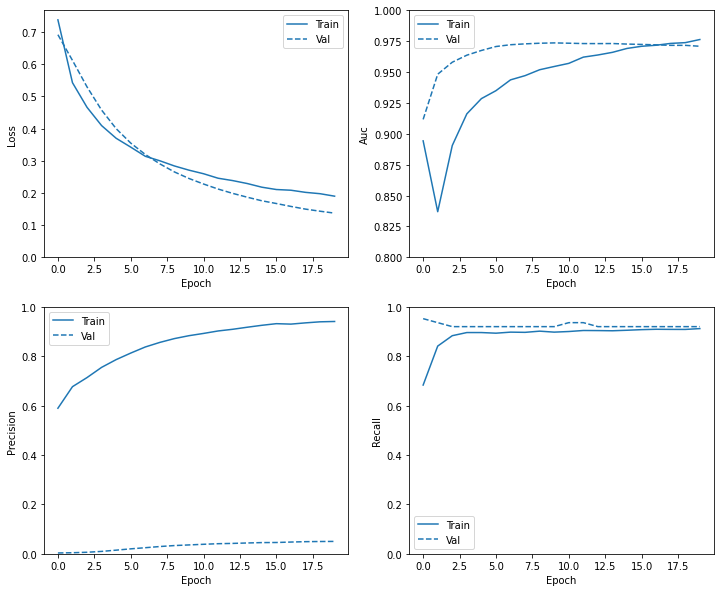

In [ ]:
plot_metrics(resampled_history)

In [ ]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.24337580800056458
tp :  94.0
fp :  1881.0
tn :  54978.0
fn :  9.0
accuracy :  0.9668200016021729
precision :  0.047594938427209854
recall :  0.9126213788986206
auc :  0.9783109426498413

Legitimate Transactions Detected (True Negatives):  54978
Legitimate Transactions Incorrectly Detected (False Positives):  1881
Fraudulent Transactions Missed (False Negatives):  9
Fraudulent Transactions Detected (True Positives):  94
Total Fraudulent Transactions:  103


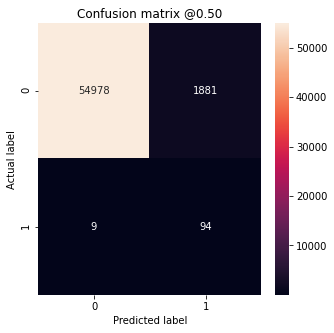

In [ ]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

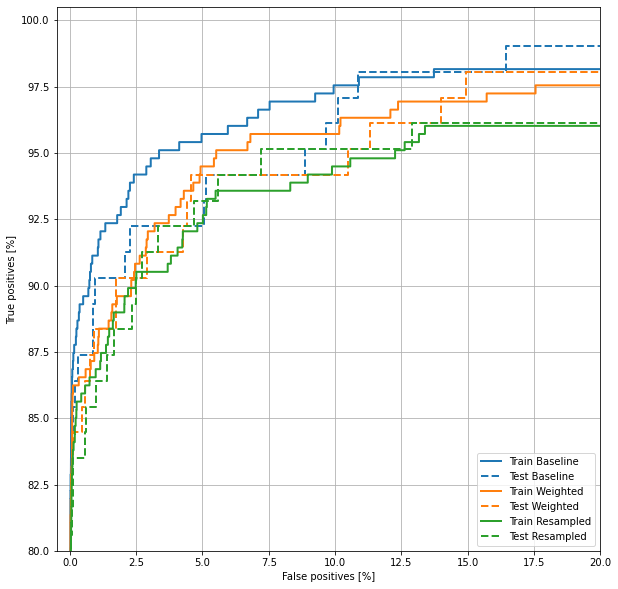

In [ ]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled,  color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled,  color=colors[2], linestyle='--')
plt.legend(loc='lower right')